In [2]:
# Deactivate distracting warnings
import warnings
warnings.filterwarnings("ignore")

In [11]:
from floodlight.io.dfl import read_position_data_xml, read_event_data_xml, read_teamsheets_from_mat_info_xml

from data_processing import display_data_summary, load_event_data, load_position_data
from visualzation import load_data, plot_event_count, plot_kde, plot_goal_positions

In [9]:
# Define the path to the dataset
path = "data/"

In [10]:
# Display Data Summary. Note that executing this code can take several minutes due the complexity of the parsing routines.
display_data_summary(path)

Unique player IDs: 207
Unique teams: 10
Total number of events: 11137
Unique event ID counts:
 eID
Play_Pass                            5241
OtherBallAction                      1699
TacklingGame                         1412
Delete                               1074
ThrowIn_Play_Pass                     281
BallClaiming                          206
Foul                                  160
FreeKick_Play_Pass                    156
Play_Cross                            140
OutSubstitution                       128
GoalKick_Play_Pass                    119
ShotAtGoal_ShotWide                    63
CornerKick_Play_Cross                  53
ShotAtGoal_SavedShot                   41
Caution                                37
ShotAtGoal_BlockedShot                 37
KickOff_Play_Pass                      32
RefereeBall                            30
FinalWhistle                           28
ThrowIn_Play_Cross                     24
PenaltyNotAwarded                      18
VideoAssistantActio

In [21]:
# Extract the player positions
import os
import pandas as pd
import numpy as np

info_files = [x for x in os.listdir(path) if "matchinformation" in x]
position_files = [x for x in os.listdir(path) if "positions_raw" in x]
n_frames = 0
for position_file, info_file in zip(position_files, info_files):
    # The function returns a tuple of five objects
    data_objects = read_position_data_xml(os.path.join(path, position_file), os.path.join(path, info_file))
    
    # Unpack the returned tuple (we are primarily interested in xy_objects)
    xy_objects, possession_objects, ballstatus_objects, teamsheets, pitch = data_objects

    # Position data is stored in the 'xy_objects' dictionary. 
    # Let's access the data for the 'firstHalf' and 'Home' team.
    home_team_first_half_xy = xy_objects['firstHalf']['Home']
    # print(f"Limits: {pitch.xlim}, {pitch.ylim}")
    # print(f"Max: {np.max(home_team_first_half_xy)}")
    # print(f"Min: {np.min(home_team_first_half_xy)}")

    # The actual X/Y coordinates are stored in the '.data' attribute 
    # of the XY object, which is a pandas DataFrame.
    XY = home_team_first_half_xy.xy
    break

print(n_frames)

0


In [22]:
# Role Detection using NMF
# Following the methodology from Section 3 "Defining and Allocating Roles"

from roles import extract_roles, get_role_heatmaps
import matplotlib.pyplot as plt

# Use the XY data from the last iteration (or load fresh data)
# XY is already defined from the previous cell

# Extract roles using the algorithm
# Note: Adjust pitch_xlim and pitch_ylim based on your data's coordinate system
results = extract_roles(
    XY,  # Convert DataFrame to numpy array
    pitch_xlim=pitch.xlim,  # Use actual pitch limits from data
    pitch_ylim=pitch.ylim,
    bin_size=5.0,  # 5m x 5m bins as specified
    sigma=1.0,  # Gaussian smoothing parameter
    n_roles=10,  # Number of latent roles (adjustable)
    max_iter=500,
    random_state=42
)

# Display results summary
print(f"Number of players: {results['n_players']}")
print(f"Number of roles (K): {results['n_roles']}")
print(f"Number of bins (L): {results['n_bins']}")
print(f"Grid shape: {results['grid_shape']}")
print(f"Reconstruction error: {results['reconstruction_error']:.4f}")
print(f"\nPlayer role assignments (dominant role per player):")
print(results['player_role_assignments'])

Number of players: 20
Number of roles (K): 10
Number of bins (L): 294
Grid shape: (14, 21)
Reconstruction error: 0.4514

Player role assignments (dominant role per player):
[8 0 5 3 1 2 0 7 0 4 0 0 0 0 3 0 6 0 9 0]


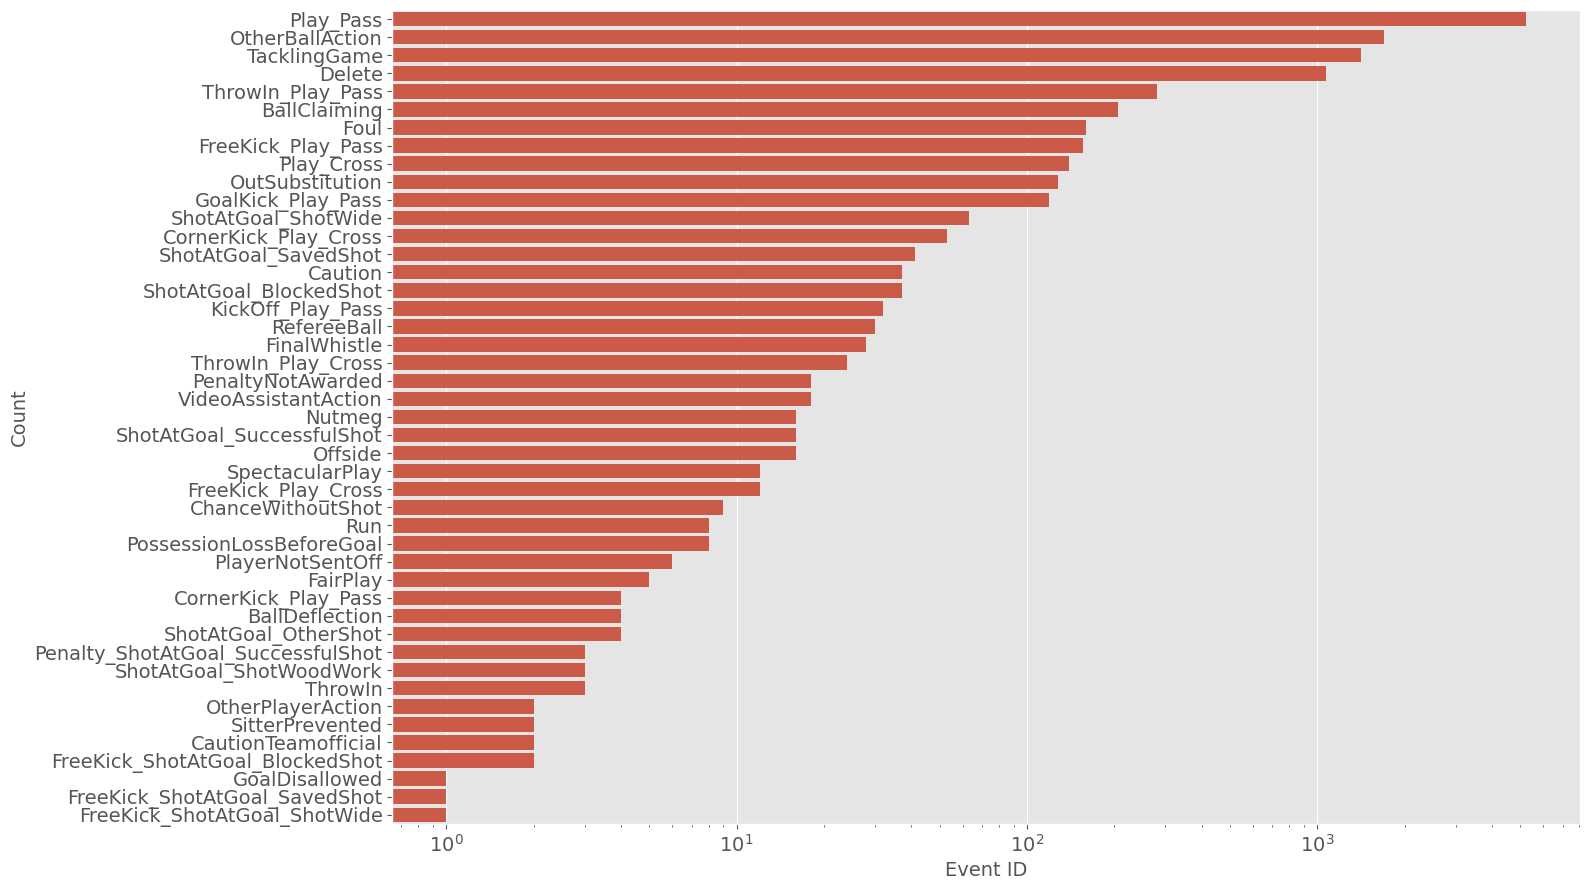

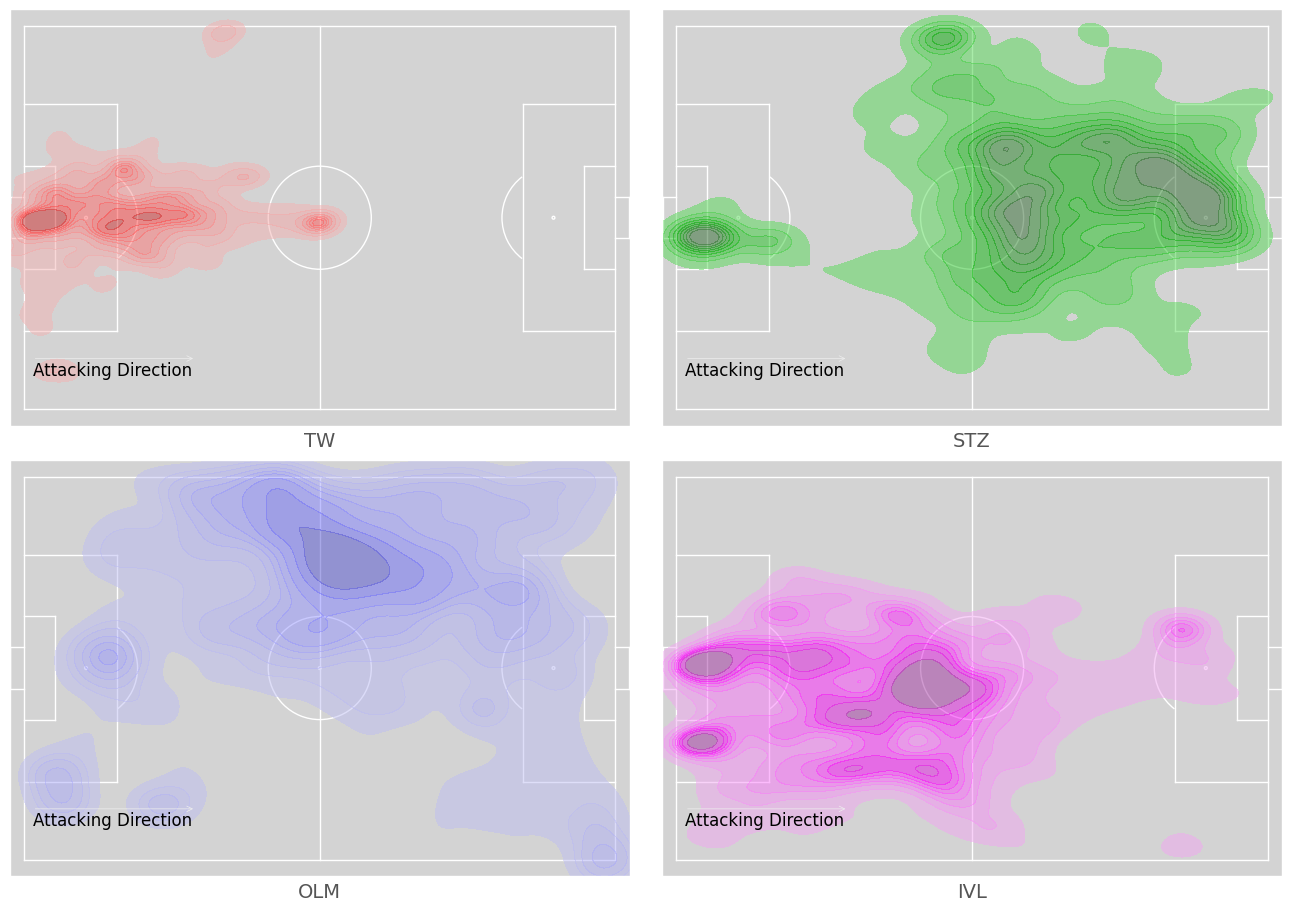

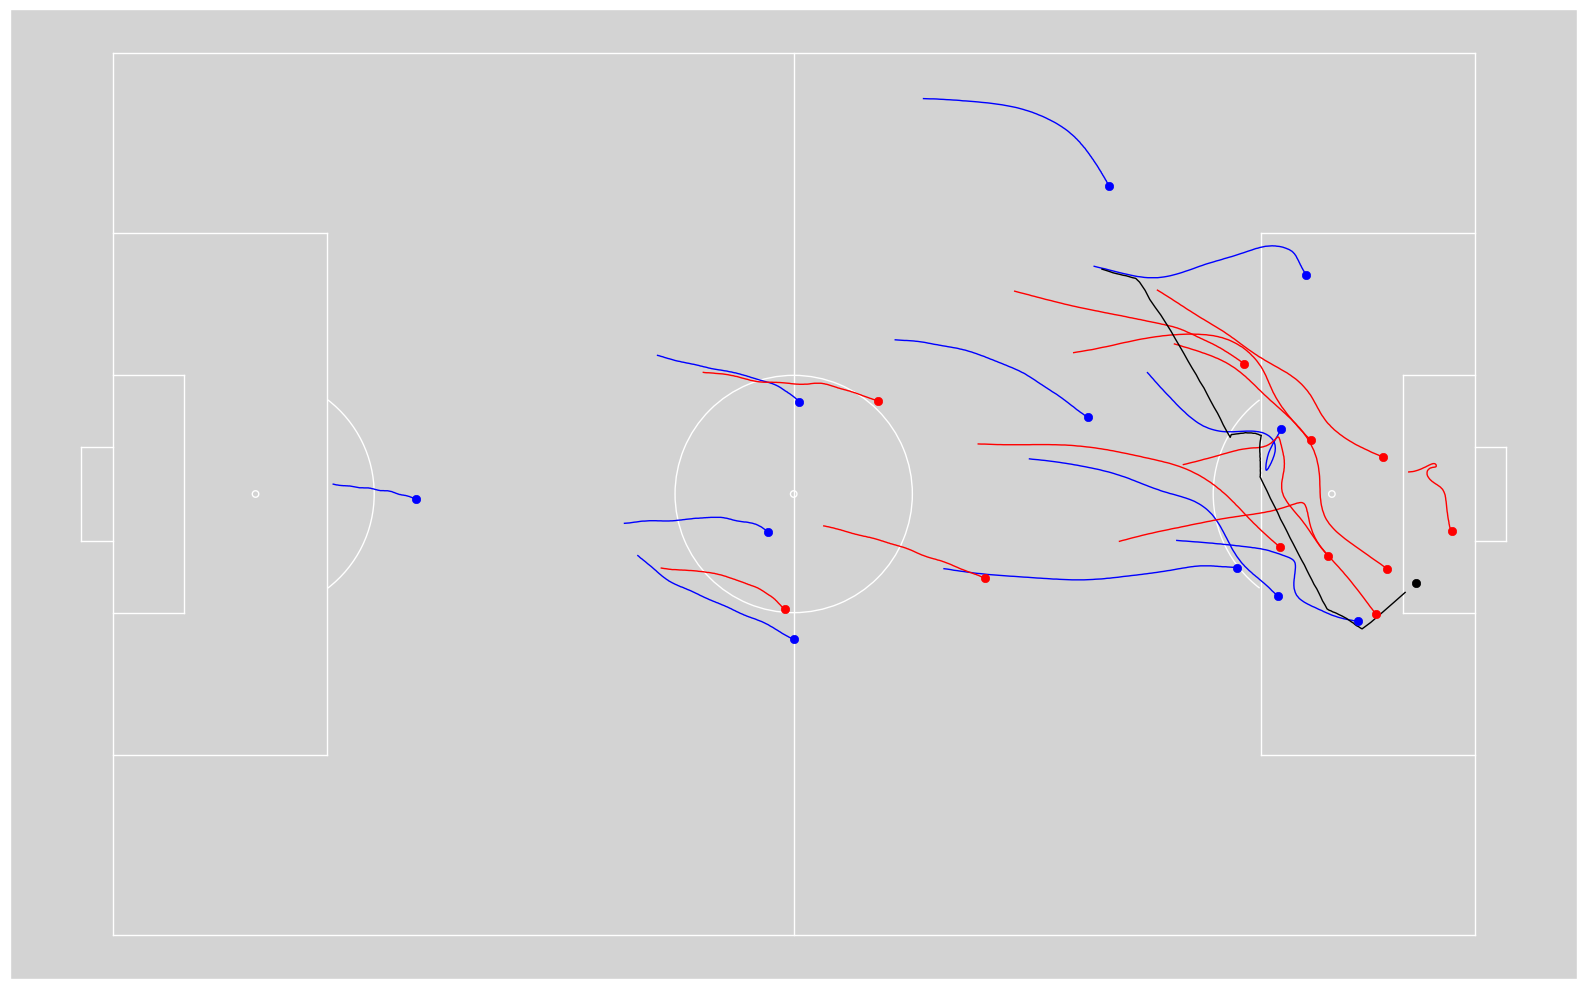

In [6]:
# Define paths and filenames. Note that executing this code can take several minutes due of the large data the KDE-plot has to process.
file_name_pos = "DFL_04_03_positions_raw_observed_DFL-COM-000002_DFL-MAT-J03WOH.xml"
file_name_infos = "DFL_02_01_matchinformation_DFL-COM-000002_DFL-MAT-J03WOH.xml"
file_name_events = "DFL_03_02_events_raw_DFL-COM-000002_DFL-MAT-J03WOH.xml"

# Load data
xy_objects, events, pitch = load_data(path, file_name_pos, file_name_infos, file_name_events)
all_events = load_event_data(path)

# Plot Event Count
plot_event_count(all_events)

# Plot KDE
plot_kde(xy_objects, pitch)

# Plot Goal Positions
plot_goal_positions(xy_objects, events, pitch)